## Welcome to your notebook.


#### Run this cell to connect to your GIS and get started:

In [1]:
from arcgis.gis import GIS
gis = GIS("home")

/opt/conda/lib/python3.7/site-packages/arcgis/gis/__init__.py:430: UserWarning: You are logged on as zstunsta with an administrator role, proceed with caution.
  self.users.me.username)


#### Now you are ready to start!

<Item title:"Popular Demographics in the United States" type:Feature Layer Collection owner:esri_demographics>
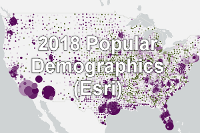

In [2]:
# Item Added From Toolbar
# Title: Popular Demographics in the United States | Type: Feature Service | Owner: esri_demographics
item = gis.content.get("2718975e52e24286acf8c3882b7ceb18")
item

In [3]:
item.layers

[<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/AGOL_Base_2018_Final/FeatureServer/0">,
 <FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/AGOL_Base_2018_Final/FeatureServer/1">,
 <FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/AGOL_Base_2018_Final/FeatureServer/2">,
 <FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/AGOL_Base_2018_Final/FeatureServer/3">,
 <FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/AGOL_Base_2018_Final/FeatureServer/4">,
 <FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/AGOL_Base_2018_Final/FeatureServer/5">]

In [4]:
import pandas as pd
from arcgis.features import GeoSeriesAccessor

In [5]:
sedf = pd.DataFrame.spatial.from_layer(item.layers[2])

In [6]:
sedf.head()

,AGEBASE_CY,AVGHHSZ_CY,AVGHHSZ_FY,AVGHINC_CY,AVGHINC_FY,AVGVAL_CY,BABYBOOMCY,CIVLBFR_CY,DIVINDX_CY,DIVINDX_FY,...,Shape__Length,TOTHH_CY,TOTHH_FY,TOTHU_CY,TOTPOP10,TOTPOP_CY,TOTPOP_FY,UNEMPRT_CY,UNEMP_CY,VACANT_CY
0,56903,2.66,2.66,71816,82037,180170,12288,27421,42.2,44.8,...,243337.109692,21182,21880,23402,54571,56903,58667,5.0,1361,2220
1,214651,2.48,2.49,77054,88438,246909,55864,102513,33.0,34.1,...,849523.992001,85554,94549,123162,182265,214651,237805,3.7,3776,37608
2,26585,2.49,2.50,49037,52001,167756,6315,9714,59.9,60.4,...,289836.622910,9395,9020,11810,27457,26585,25718,7.2,703,2415
3,23003,2.57,2.56,57325,66304,134379,5085,8612,41.5,41.5,...,227503.490340,8061,8082,9237,22915,23003,22969,5.6,481,1176
4,57971,2.64,2.64,62290,72128,165363,13914,25203,31.0,31.0,...,280823.774884,21804,21790,24391,57322,57971,57955,5.0,1265,2587


In [7]:
fl = item.layers[2]
nc_fql =  fl.query(where="ST_ABBREV = 'NC'")

In [8]:
nc_fql

<FeatureSet> 100 features

In [9]:
nc_map = gis.map('North Carolina, USA')
nc_map

MapView(layout=Layout(height='400px', width='100%'))

In [10]:
nc_map.add_layer(nc_fql)

In [11]:
nc_sedf = fl.query(where="ST_ABBREV = 'NC'").sdf

In [12]:
nc_sedf.head()

,OBJECTID,ID,NAME,ST_ABBREV,TOTPOP_CY,HHPOP_CY,POPDENS_CY,TOTHH_CY,AVGHHSZ_CY,POPGRW10CY,...,Shape__Length,TOTHU_CY,OWNER_CY,RENTER_CY,OOMORT10,OONOMORT10,POPOWN10,POPRENT10,VACANT_CY,SHAPE
0,1891,37001,Alamance County,NC,165289,160669,389.9,65297,2.46,1.09,...,176867.981583,72550,42587,22710,27247,12857,99517,47385,7253,"{""rings"": [[[-8820657, 4279197], [-8854623, 42..."
1,1892,37003,Alexander County,NC,37917,36591,145.8,14652,2.50,0.23,...,141069.935443,16566,10606,4046,6668,4520,27938,8099,1914,"{""rings"": [[[-9020088, 4306905], [-9017257, 43..."
2,1893,37005,Alleghany County,NC,11302,11191,48.1,4817,2.32,0.16,...,162054.355811,8486,3678,1139,1843,1733,8201,2843,3669,"{""rings"": [[[-9006684, 4377517], [-9007816, 43..."
3,1894,37007,Anson County,NC,26721,24070,50.3,9601,2.51,-0.10,...,212044.617284,11576,6099,3502,3524,3180,16703,7761,1975,"{""rings"": [[[-8930606, 4185134], [-8928725, 41..."
4,1895,37009,Ashe County,NC,27622,27294,64.8,11843,2.30,0.15,...,188885.250695,17944,8608,3235,4638,4514,20937,5975,6101,"{""rings"": [[[-9056390, 4376266], [-9056068, 43..."


In [13]:
nc_sedf.spatial.plot()

MapView(layout=Layout(height='400px', width='100%'))

In [14]:
nc_demographics = nc_sedf.spatial.to_featurelayer('NC_Demographic_Layer_ZST', 
                                              tags=['ArcGIS Learn', 'Learn Lesson'])

In [15]:
nc_demographics

<Item title:"NJ_Demographic_Layer_ZST" type:Feature Layer Collection owner:zstunsta>

In [23]:
nc_map = gis.map('North Carolina, USA')
nc_map

MapView(layout=Layout(height='400px', width='100%'))

In [24]:
nc_map.add_layer(nc_demographics)

In [25]:
nc_sedf.spatial.to_featureclass('/arcgis/home/NC_Demographics_Layer_ZST.shp', overwrite=True)

'/arcgis/home/NJ_Demographics_Layer_ZST.shp'

In [26]:
nc_sedf_from_fc = pd.DataFrame.spatial.from_featureclass('/arcgis/home/NC_Demographics_Layer_ZST.shp')

In [27]:
nc_sedf_from_fc.sort_values('totpop_cy', ascending=False, inplace=True)

In [28]:
nc_sedf_from_fc.head(10)

,index,objectid,id,name,st_abbrev,totpop_cy,hhpop_cy,popdens_cy,tothh_cy,avghhsz_cy,...,tothu_cy,owner_cy,renter_cy,oomort10,oonomort10,popown10,poprent10,vacant_cy,SHAPE,OBJECTID
91,91,1982,37183,Wake County,NC,1092636,1071793,1308.2,415940,2.58,...,445518,261816,154124,187849,37305,599727,280283,29578,"{""rings"": [[[-8758976.0, 4310875.0], [-8743746...",91
59,59,1950,37119,Mecklenburg County,NC,1092533,1075436,2085.6,425174,2.53,...,461788,237486,187688,184971,34617,567604,336009,36614,"{""rings"": [[[-8993149.0, 4231091.0], [-8989290...",59
40,40,1931,37081,Guilford County,NC,527708,510582,817.3,211168,2.42,...,233152,121131,90037,91279,28290,297833,175081,21984,"{""rings"": [[[-8854258.0, 4312007.0], [-8854545...",40
33,33,1924,37067,Forsyth County,NC,378496,367930,927.4,151655,2.43,...,168382,92503,59152,66326,23862,221548,119271,16727,"{""rings"": [[[-8928103.0, 4336347.0], [-8926584...",33
25,25,1916,37051,Cumberland County,NC,331428,322369,508.1,127828,2.52,...,145612,63980,63848,52486,15881,175477,133797,17784,"{""rings"": [[[-8763127.0, 4199944.0], [-8762940...",25
31,31,1922,37063,Durham County,NC,319911,306049,1118.7,128971,2.37,...,139420,68346,60625,48169,11130,143487,113979,10449,"{""rings"": [[[-8775535.0, 4333257.0], [-8775099...",31
10,10,1901,37021,Buncombe County,NC,266257,258373,405.5,111138,2.32,...,125637,69735,41403,42098,23883,156176,74469,14499,"{""rings"": [[[-9170690.0, 4276446.0], [-9169786...",10
89,89,1980,37179,Union County,NC,236081,233865,373.8,78891,2.96,...,84580,63835,15056,44484,10666,161740,37502,5689,"{""rings"": [[[-8961817.0, 4188926.0], [-8960005...",89
64,64,1955,37129,New Hanover County,NC,230674,223960,1204.3,97680,2.29,...,114426,53669,44011,38962,12467,121358,74611,16746,"{""rings"": [[[[-8676358.0, 4025220.0], [-867636...",64
35,35,1926,37071,Gaston County,NC,224144,220815,629.6,86506,2.55,...,94984,56499,30007,38181,15692,137555,65214,8478,"{""rings"": [[[-9015050.0, 4214016.0], [-9014051...",35


In [29]:
import plotly.express as px
fig = px.bar(nc_sedf_from_fc, x='name', y='totpop_cy')
fig.show()